## Exercise 02

Metropolis simulation of the 1d quantum anharmonic oscillator.

A c++ code to simulate the model is available in the folder 'code', and the data from which these plots are made are in 'code/results'

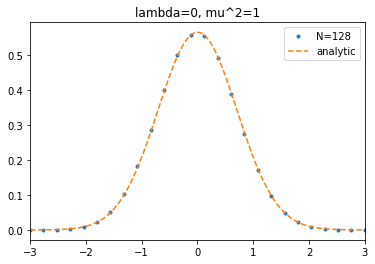

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
dat = np.loadtxt("code/results/h_mu1_lamda0")
plt.plot(dat[:,0],dat[:,1], '.', label="N=128")
x = np.arange(-3,3,0.01)
plt.plot(x, np.exp(-x*x)/np.sqrt(np.pi), '--', label="analytic")
plt.xlim(-3,3)
plt.title("lambda=0, mu^2=1")
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

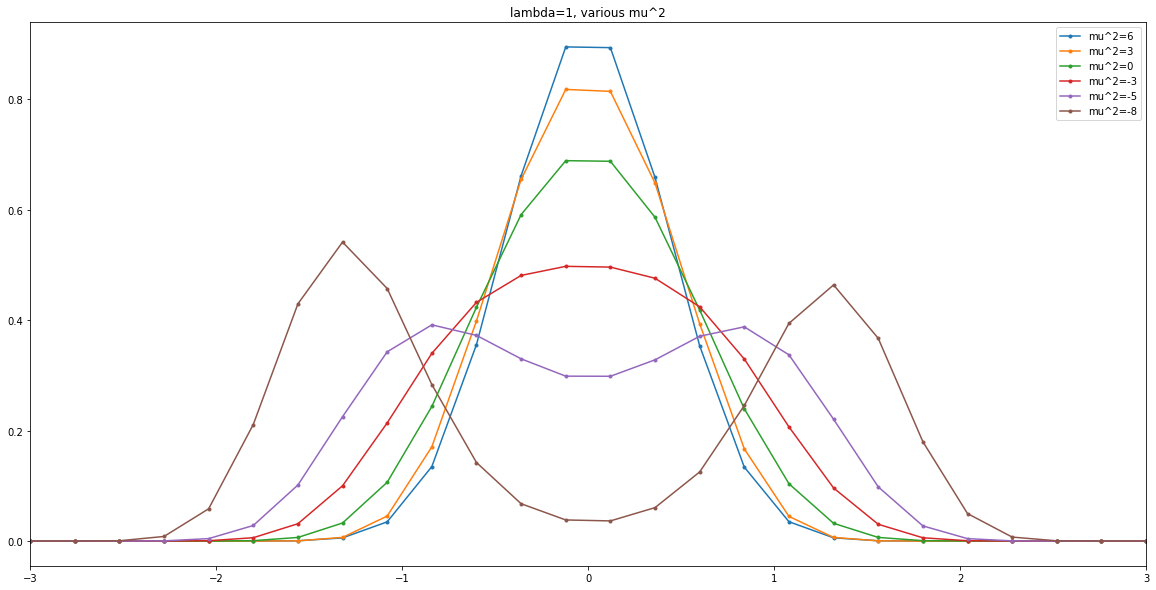

In [2]:
plt.figure()
dat = np.loadtxt("code/results/h_mu6")
plt.plot(dat[:,0],dat[:,1], '.-', label="mu^2=6")
dat = np.loadtxt("code/results/h_mu3")
plt.plot(dat[:,0],dat[:,1], '.-', label="mu^2=3")
dat = np.loadtxt("code/results/h_mu0")
plt.plot(dat[:,0],dat[:,1], '.-', label="mu^2=0")
dat = np.loadtxt("code/results/h_mu-3")
plt.plot(dat[:,0],dat[:,1], '.-', label="mu^2=-3")
dat = np.loadtxt("code/results/h_mu-5")
plt.plot(dat[:,0],dat[:,1], '.-', label="mu^2=-5")
dat = np.loadtxt("code/results/h_mu-8")
plt.plot(dat[:,0],dat[:,1], '.-', label="mu^2=-8")
plt.xlim(-3,3)
plt.title("lambda=1, various mu^2")
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

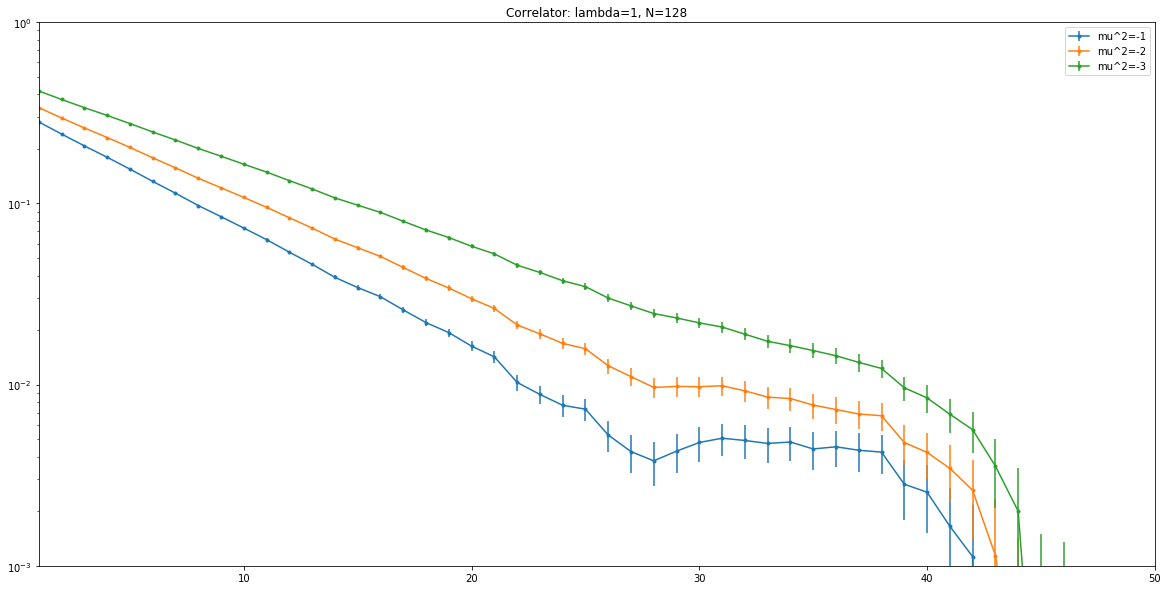

In [3]:
plt.figure()
dat = np.loadtxt("code/results/h_mu-1_corr")
plt.errorbar(dat[:,0], dat[:,1], yerr = dat[:,2], marker = '.', label="mu^2=-1")
dat = np.loadtxt("code/results/h_mu-2_corr")
plt.errorbar(dat[:,0], dat[:,1], yerr = dat[:,2], marker = '.', label="mu^2=-2")
dat = np.loadtxt("code/results/h_mu-3_corr")
plt.errorbar(dat[:,0], dat[:,1], yerr = dat[:,2], marker = '.', label="mu^2=-3")
plt.yscale("log", nonposy='clip')
plt.xlim(1,50)
plt.ylim(0.001,1)
plt.title("Correlator: lambda=1, N=128")
plt.legend()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

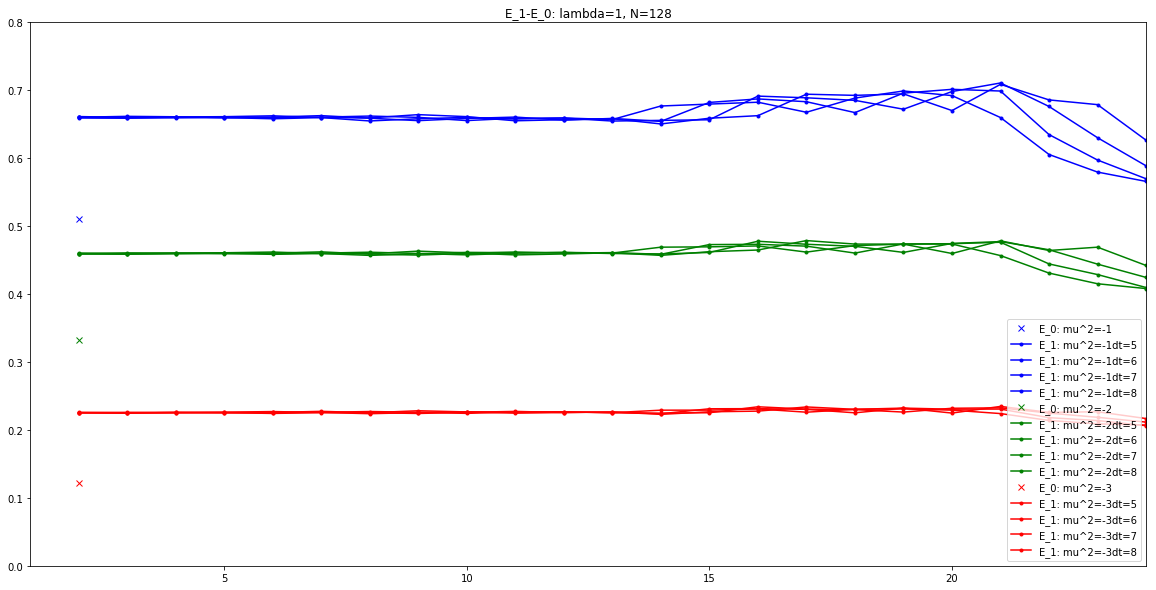

In [9]:
plt.figure()
color = ['r', 'g', 'b']
# these values for E_0 are copied from the output files in code/results
E0 = {}
E0[-1]=0.50980651272806732
E0[-2]=0.33261720673993472
E0[-3]=0.12223116355668487

plt.xlim(1,24)
plt.ylim(0,0.8)
plt.title("E_1-E_0: lambda=1, N=128")
plt.rcParams["figure.figsize"] = (20,10)
for mu2 in [-1,-2,-3]:
    dat = np.loadtxt('code/results/h_mu'+str(mu2)+'_corr')
    plt.plot(2, E0[mu2], 'x', color=color[mu2], label='E_0: '+'mu^2='+str(mu2))
    for dt in range(5,9):
        arr = []
        for t in range(2,30):
            arr.append([t, -np.log((dat[t+dt]/dat[t])[1])/dt])
        arr = np.array(arr)
        plt.plot(arr[:,0], arr[:,1]+E0[mu2], '.-', color=color[mu2], label = 'E_1: mu^2='+str(mu2)+' [dt='+str(dt)+']')
plt.legend()
plt.show()